## MuSpAn: Figure 6. Biologically-driven pipeline development using MuSpAn

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import muspan as ms
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(8)

# Define helper functions
def make_circle(centre, radius, nVerts=200):
    pts = []
    for v in range(nVerts):
        theta = -v * 2 * np.pi / nVerts
        pts.append([radius * np.cos(theta), radius * np.sin(theta)])
    pts = pts + np.asarray(centre)
    return np.asarray(pts)

def make_annulus(centre, r_inner, r_outer, nVertsPerRing=200):
    outer = make_circle(centre, r_outer, nVertsPerRing)
    inner = make_circle(centre, r_inner, nVertsPerRing)
    return [outer, [inner]]


For reproducibility we use the io save-load functionality of muspan to load a premade domain of the sample.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

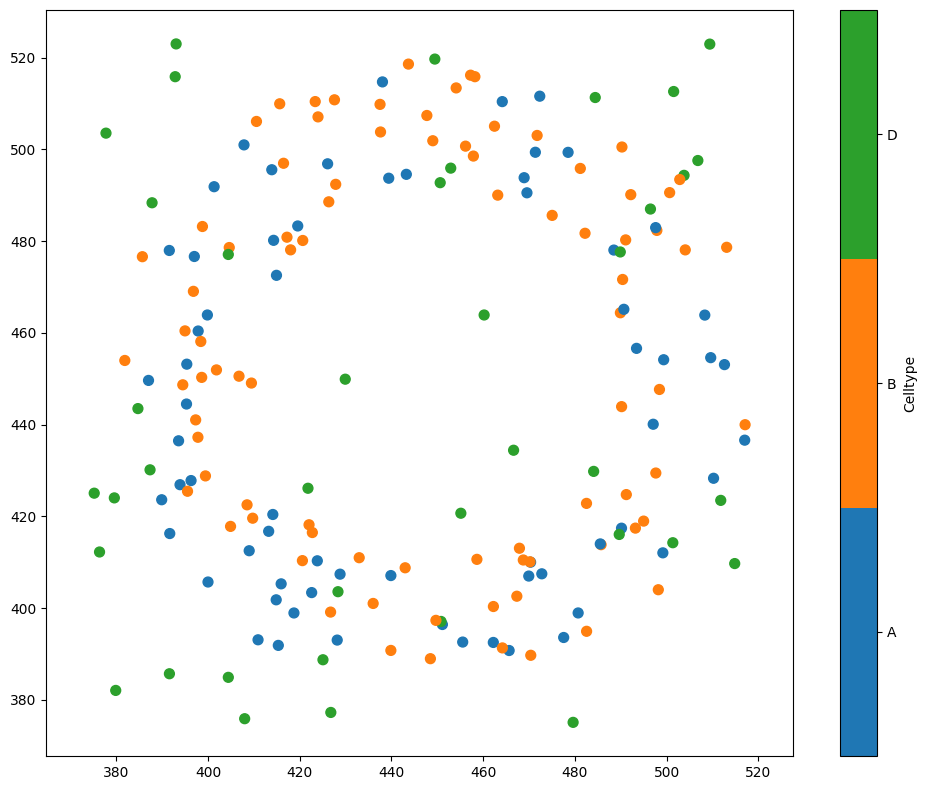

In [2]:
# Load the domain from the specified file
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Visualise the domain with color coding by 'Celltype'
ms.visualise.visualise(domain_5, color_by='Celltype',marker_size=50)

MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(367.5, 532.5, 368.0322580645161, 531.9677419354839)

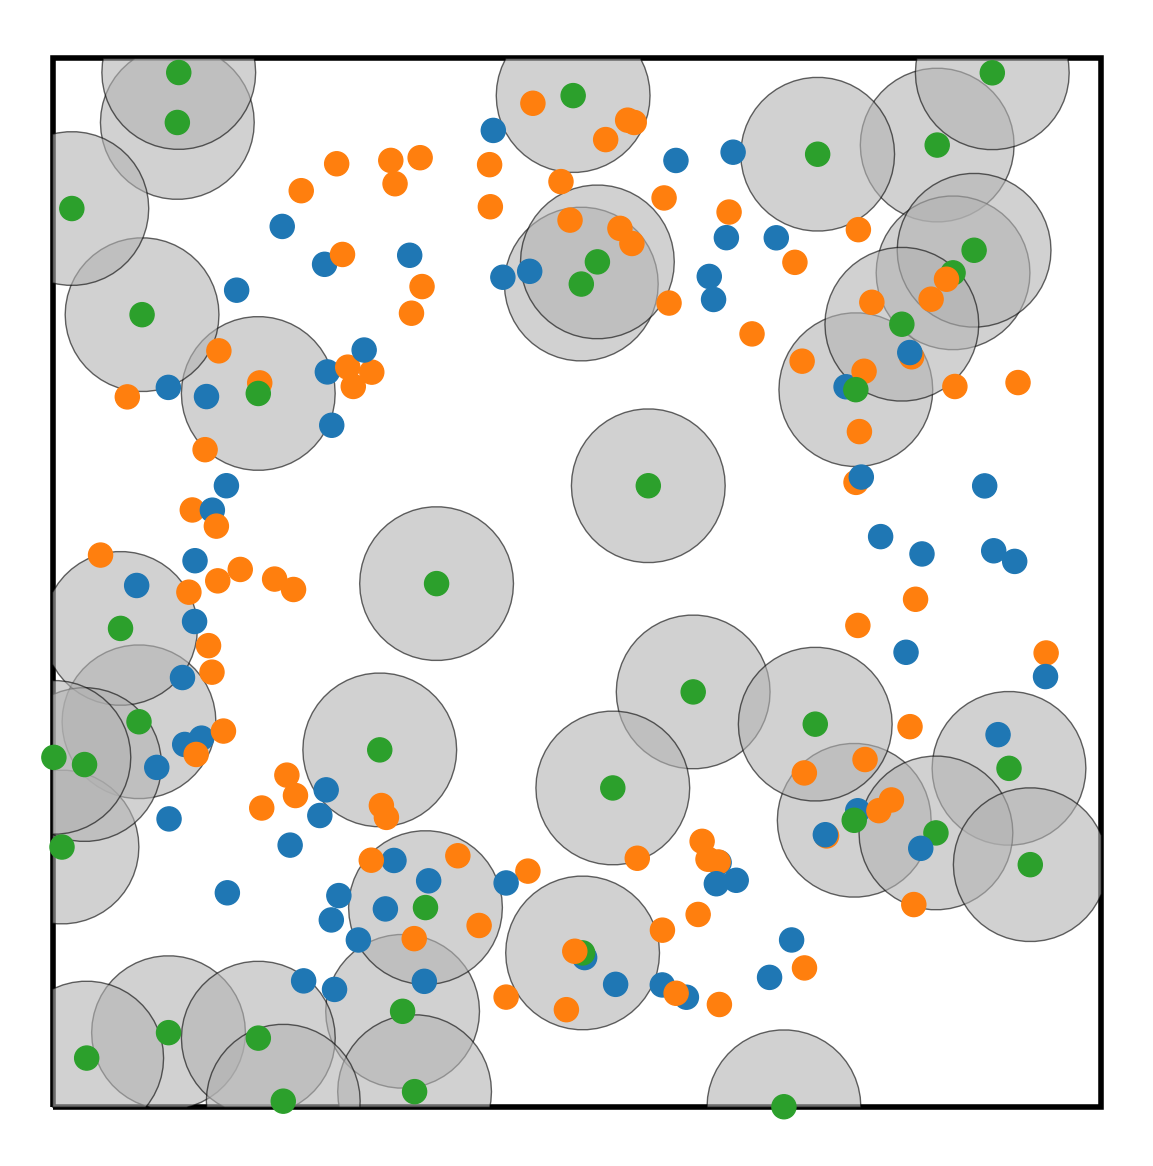

In [3]:
# Load the domain from the specified file
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Query the domain for objects with label 'Celltype' equal to 'D'
qA = ms.query.query(domain_5, ('label', 'Celltype'), 'is', 'D')
IDs_A = ms.query.interpret_query(qA)

# Initialize an empty list to store annuli
annuli = []

# Loop through each ID in IDs_A to create annuli
for ID in IDs_A:
    centre = domain_5.objects[ID].centroid  # Get the centroid of the object
    inner = 1  # Inner radius of the annulus
    width = 10  # Width of the annulus
    annuli.append(make_annulus(centre, inner, inner + width, nVertsPerRing=50))  # Create annulus and add to list

# Add the annuli shapes to the domain and get their IDs
annuli_IDs = domain_5.add_shapes_with_internal_holes(annuli, return_IDs=True, zorder=0)

# Define a square shape for cropping
shape = np.array([[375, 375], [375, 525], [525, 525], [525, 375]])

# Add the square shape to the domain and get its ID
crop_ID_local = domain_5.add_shapes([shape], 'Square', return_IDs=True)

# Crop the domain using the square shape
domain = ms.helpers.crop_domain(domain_5, shape=crop_ID_local)[crop_ID_local[0]]

# Visualize the cropped domain with color coding by 'Celltype'
ms.visualise.visualise(domain, 'Celltype', marker_size=300, figure_kwargs={'figsize': (12, 12)}, add_cbar=False, show_boundary=True)
plt.gca().axis(False)  # Hide the axis

MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(360.2536189327845, 532.8450657651055, 361.79428742347767, 536.2693341520225)

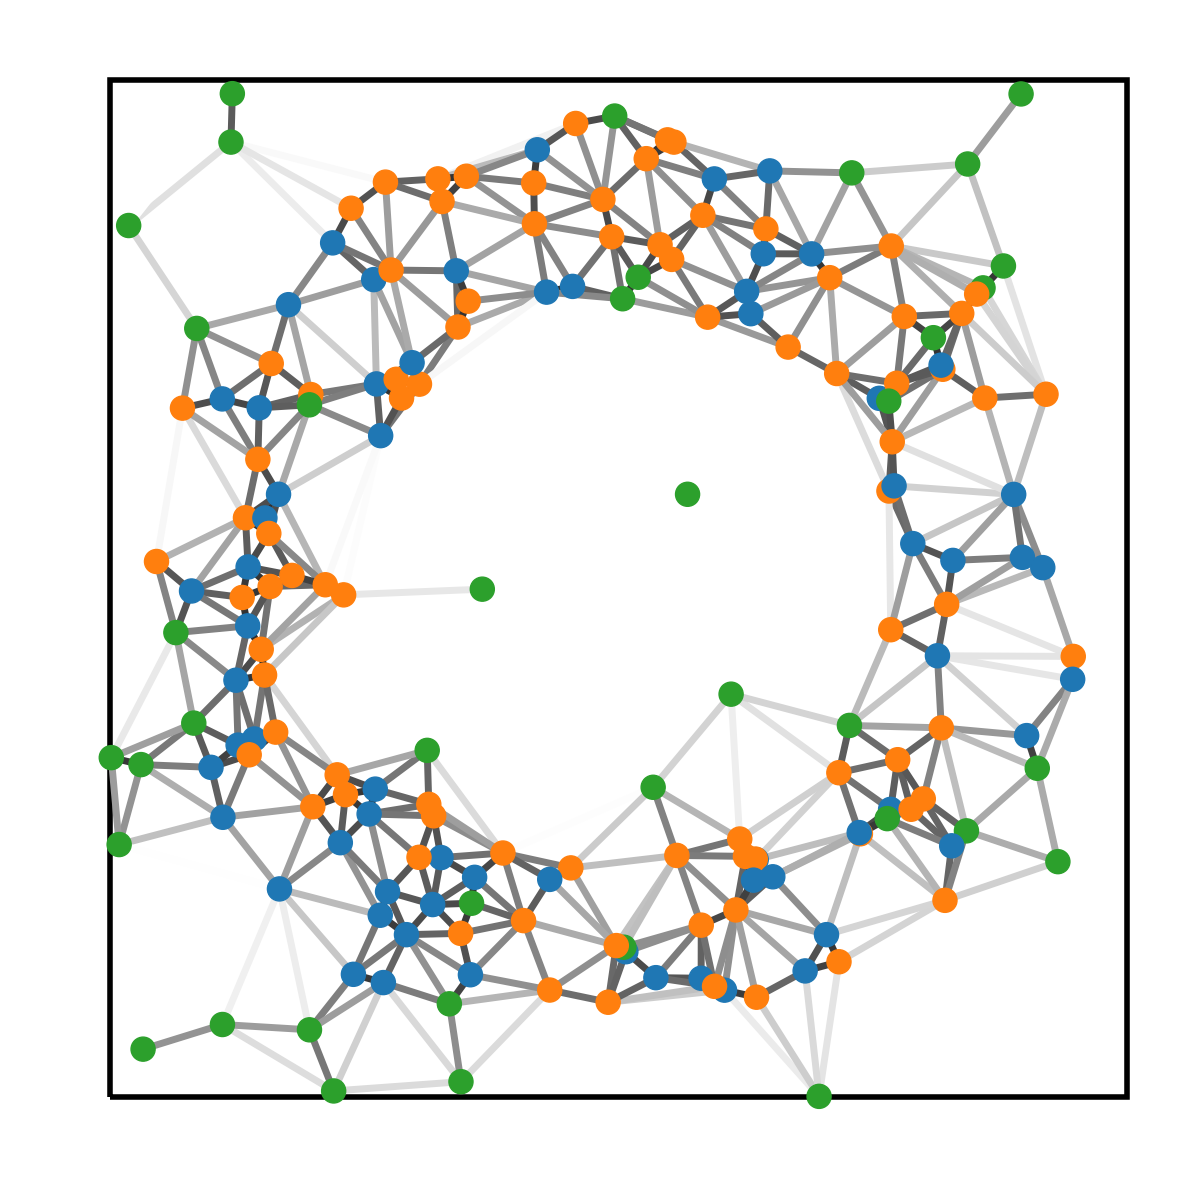

In [4]:
#%% Delaunay network

# Reset the domain to avoid having the annuli again
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Generate a Delaunay network with a maximum edge distance of 25
ms.networks.generate_network(domain_5, network_name='Delaunay CC', network_type='Delaunay', objects_as_nodes=('collection', 'Cell centres'), max_edge_distance=25)

# Visualize the domain with color coding by 'Celltype'
ms.visualise.visualise(domain_5, 'Celltype', marker_size=300, figure_kwargs={'figsize': (12, 12)}, add_cbar=False, show_boundary=True)

# Visualize the Delaunay network on top of the domain
ms.visualise.visualise_network(domain_5, network_name='Delaunay CC', ax=plt.gca(), visualise_kwargs={'marker_size': 0, 'add_cbar': False}, add_cbar=False, edge_width=5)

# Hide the axis for a cleaner visualization
plt.gca().axis(False)

MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(367.5, 532.5, 368.0322580645161, 531.9677419354839)

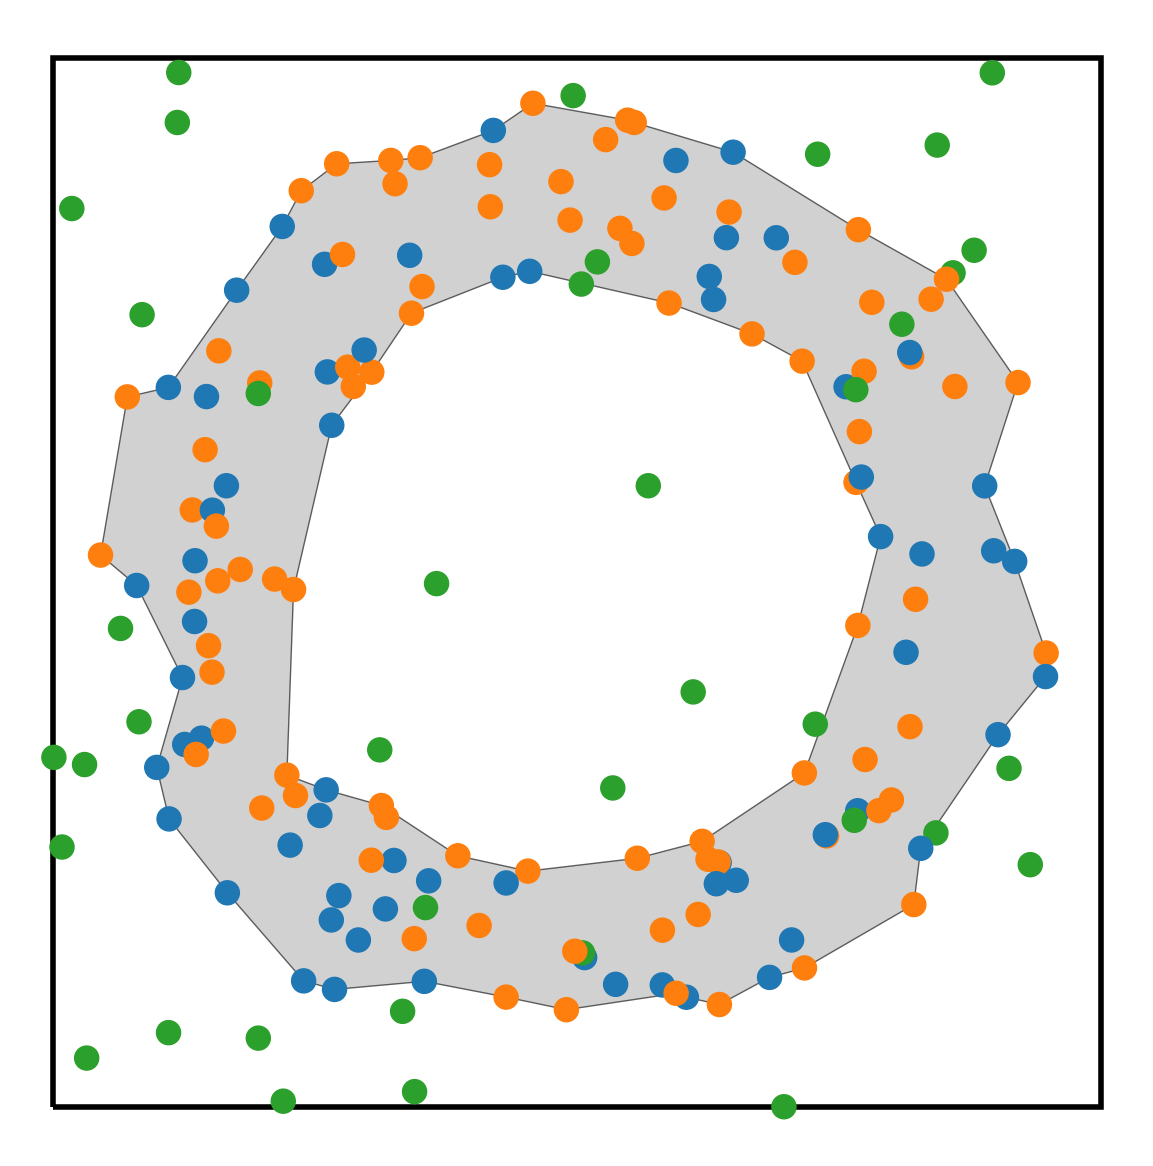

In [5]:
#%% Alpha Shape

# Load the domain from the specified file
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Query the domain for objects with label 'Celltype' equal to 'A' or 'B'
ring = ms.query.query_container(('Celltype', 'A'), 'OR', ('Celltype', 'B'), domain=domain_5)

# Convert the queried objects to a new shape using the alpha shape method
# Alpha shape is a generalization of the convex hull
new_IDs = domain_5.convert_objects(
    ring,
    collection_name='New object',
    return_IDs=True,
    object_type='shape',
    conversion_method='alpha shape',
    conversion_method_kwargs=dict(alpha=15)
)

# Visualize the domain with color coding by 'Celltype'
ms.visualise.visualise(domain_5, 'Celltype', marker_size=300, figure_kwargs={'figsize': (12, 12)}, add_cbar=False, show_boundary=True)

# Hide the axis for a cleaner visualization
plt.gca().axis(False)


MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(368.39065453399894, 531.6093454660011, 367.5, 532.5)

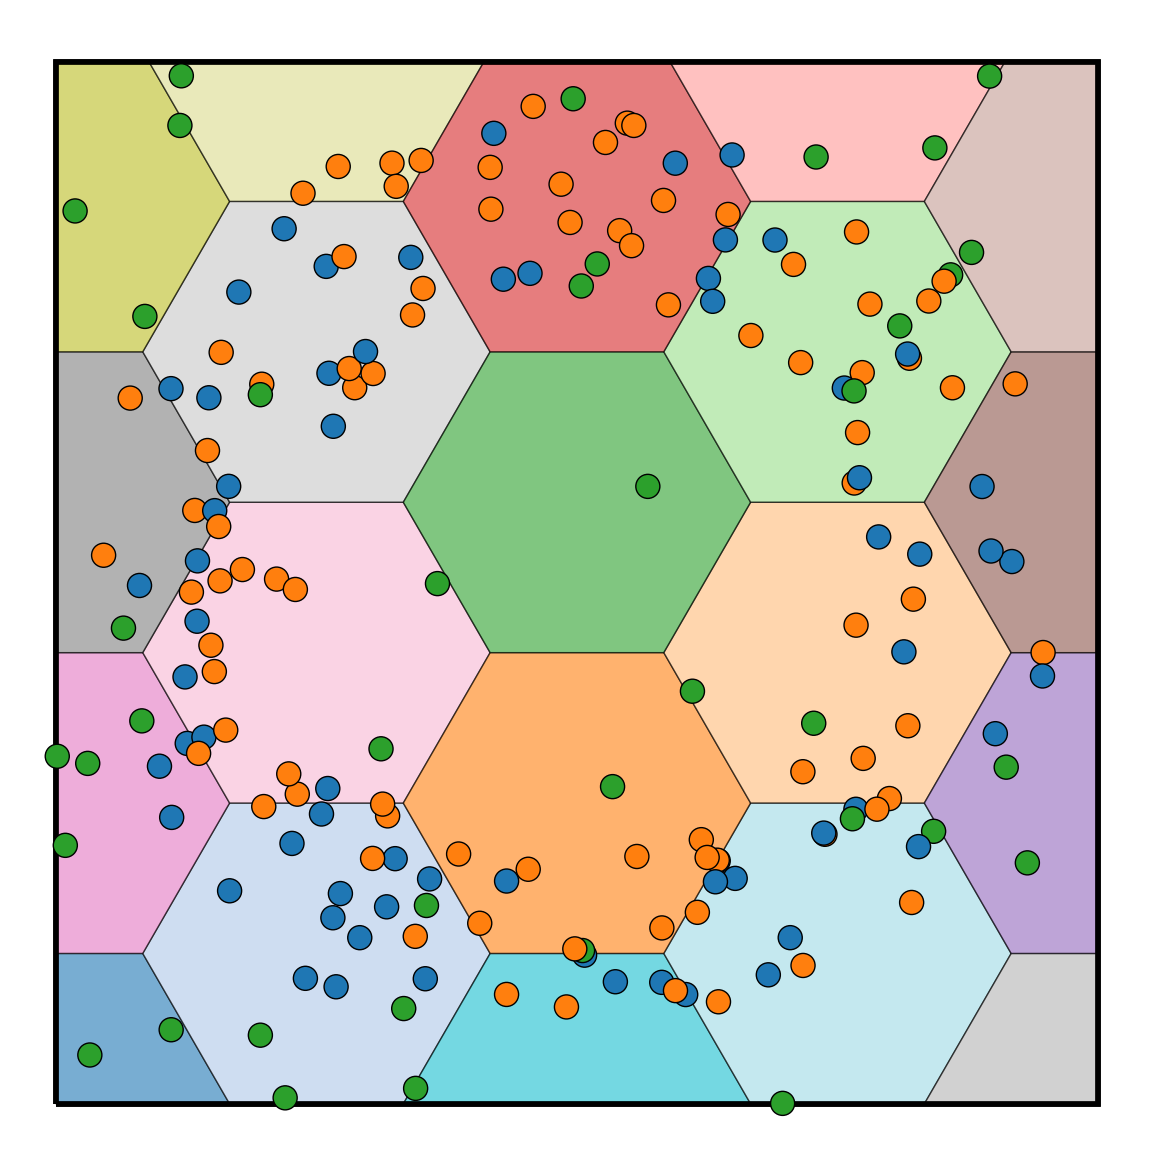

In [6]:
#%% Quadrats

# Load the domain from the specified file
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Generate a hexagonal grid over the domain with specified side length
hexgrid = ms.region_based.generate_hexgrid(domain_5, side_length=25, remove_empty_regions=False)

# Add the square shape to the domain and get its ID
crop_ID_local = domain_5.add_shapes([shape], 'Square', return_IDs=True)

# Visualize the domain with the hexagonal grid
ms.visualise.visualise(domain_5, 'ROI', objects_to_plot=('collection', 'Hexgrid'), marker_size=300, figure_kwargs={'figsize': (12, 12)}, add_cbar=False, show_boundary=True)

# Overlay the cell centers on the same plot
ms.visualise.visualise(domain_5, 'Celltype', objects_to_plot=('collection', 'Cell centres'), marker_size=300, ax=plt.gca(), scatter_kwargs={'edgecolor': 'k'}, add_cbar=False, show_boundary=True)

# Hide the axis for a cleaner visualization
plt.gca().axis(False)

MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(367.5, 532.5, 368.0322580645161, 531.9677419354839)

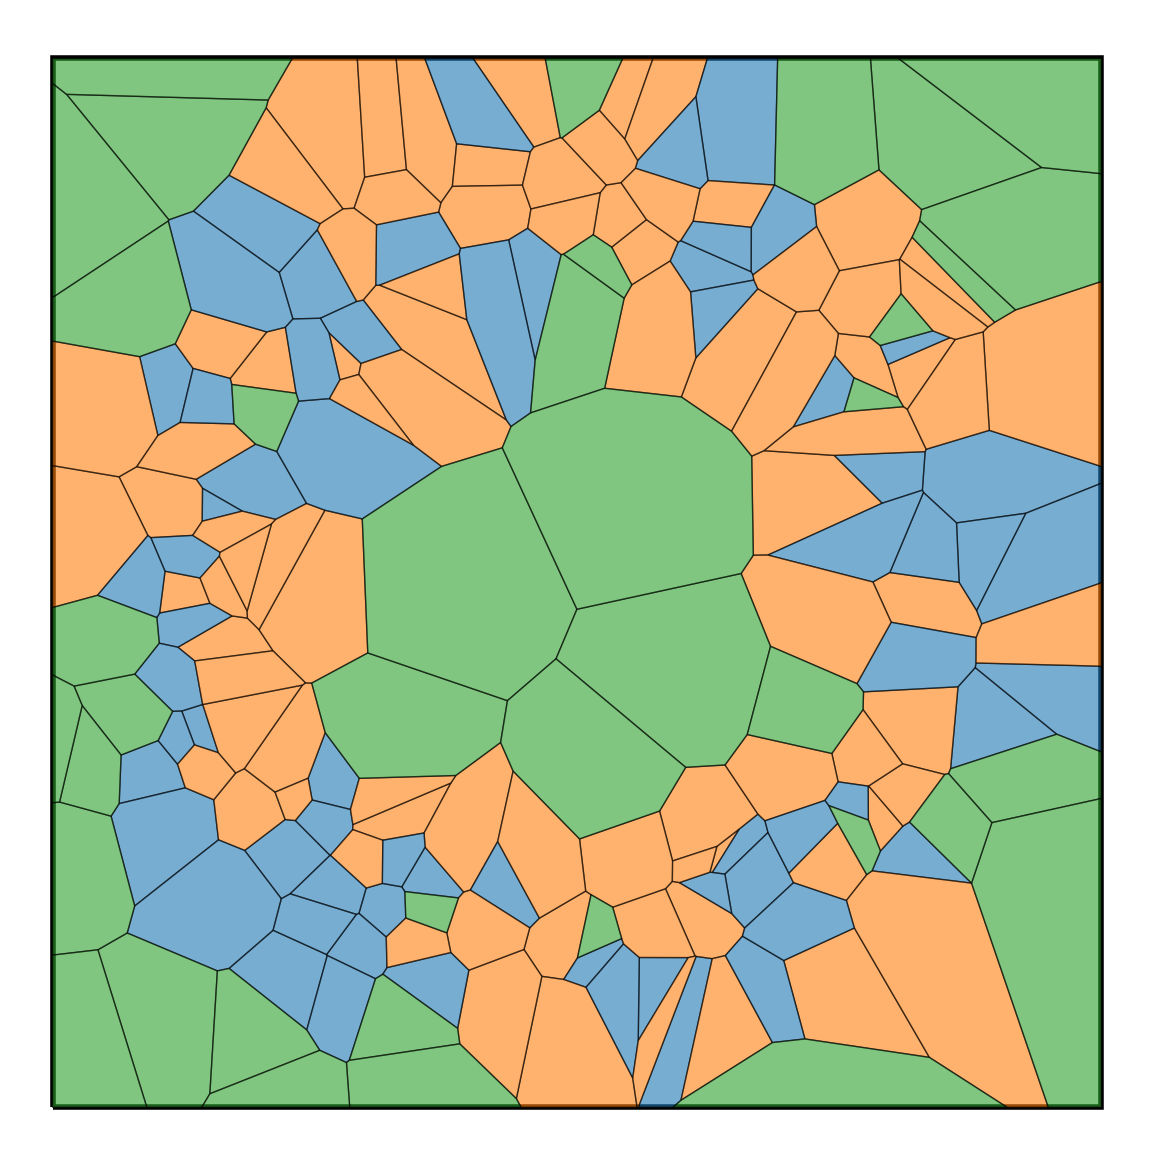

In [7]:
#%% Neighbourhood enrichment

# Load the domain from the specified file
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Convert cell centres to Voronoi shapes
domain_5.convert_objects(
    population=('collection', 'Cell centres'),
    object_type='shape',
    collection_name='VT',
    return_IDs=False,
    conversion_method='voronoi'
)

# Visualize the domain with color coding by 'Celltype'
ms.visualise.visualise(
    domain_5,
    color_by='Celltype',
    objects_to_plot=('collection', 'VT'),
    marker_size=300,
    figure_kwargs={'figsize': (12, 12)},
    add_cbar=False,
    show_boundary=True
)

# Hide the axis for a cleaner visualization
plt.gca().axis(False)

MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(375.0, 525.0, 375.0, 525.0)

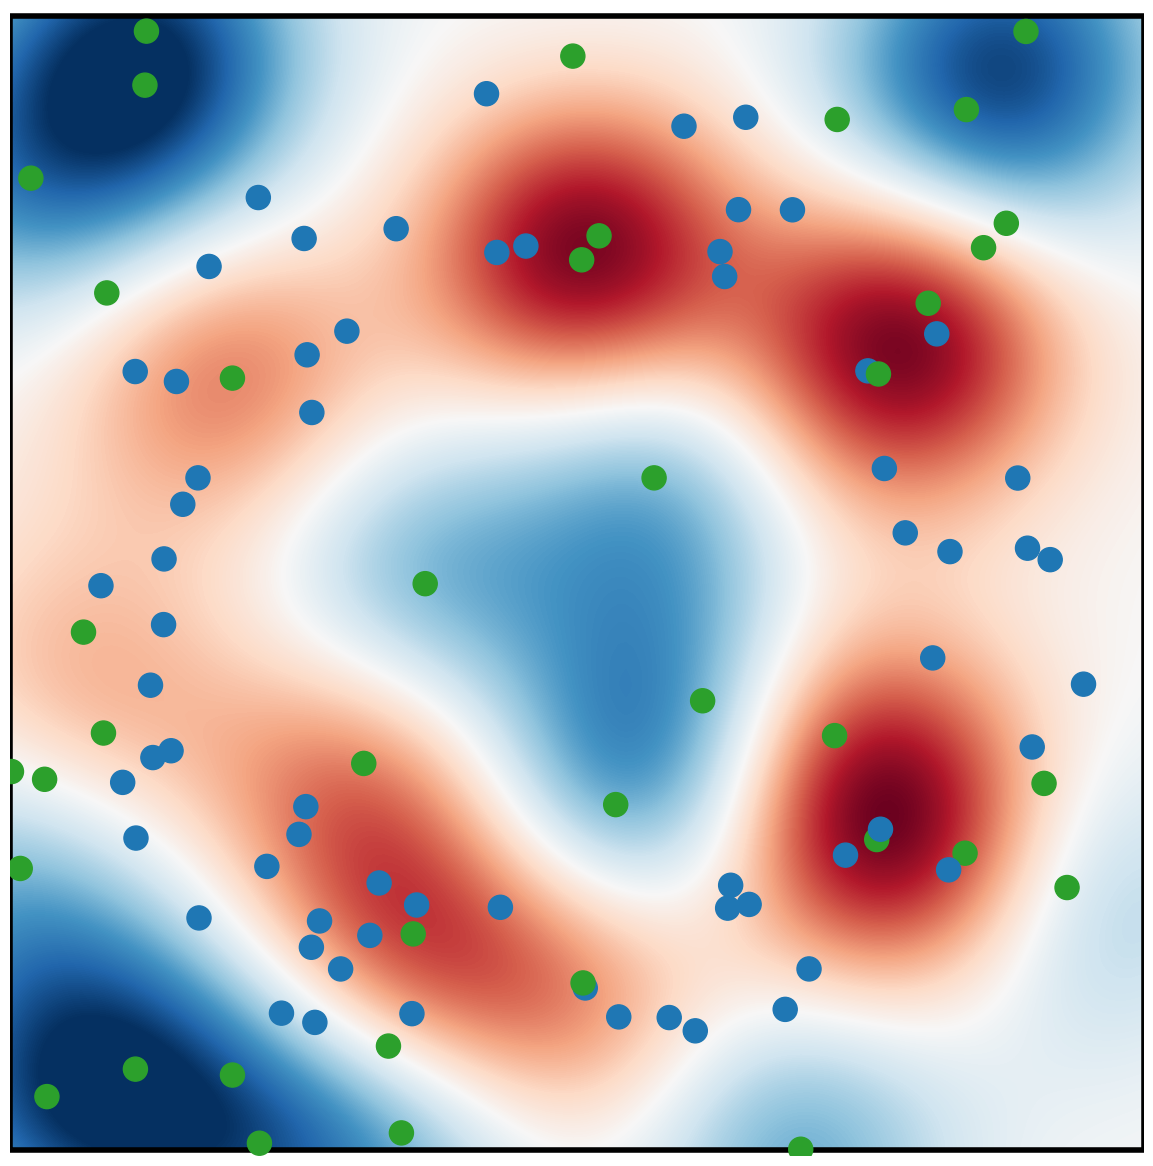

In [8]:
#%% TCM (Topographical Correlation Map)

# Load the domain from the specified file
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Calculate the Topographical Correlation Map (TCM) between 'Celltype' D and 'Celltype' A
TCM = ms.spatial_statistics.topographical_correlation_map(
    domain_5, 
    ('Celltype', 'D'), 
    ('Celltype', 'A'),
    radius_of_interest=15,
    kernel_sigma=15,
    kernel_radius=100,
    mesh_step=1
)

# Query the domain for objects with label 'Celltype' equal to 'A' or 'D'
q = ms.query.query_container(('Celltype', 'A'), 'OR', ('Celltype', 'D'), domain=domain_5)

# Visualize the domain with color coding by 'Celltype'
ms.visualise.visualise(
    domain_5,
    'Celltype',
    objects_to_plot=q,
    marker_size=300,
    figure_kwargs={'figsize': (12, 12)},
    add_cbar=False,
    show_boundary=True
)

# Overlay the Topographical Correlation Map (TCM) on the same plot
ms.visualise.visualise_topographical_correlation_map(
    domain_5,
    TCM,
    add_cbar=False,
    ax=plt.gca(),
    TCM_zorder=-1000
)

# Hide the axis for a cleaner visualization
plt.gca().axis(False)

MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(367.5, 532.5, 367.5, 532.5)

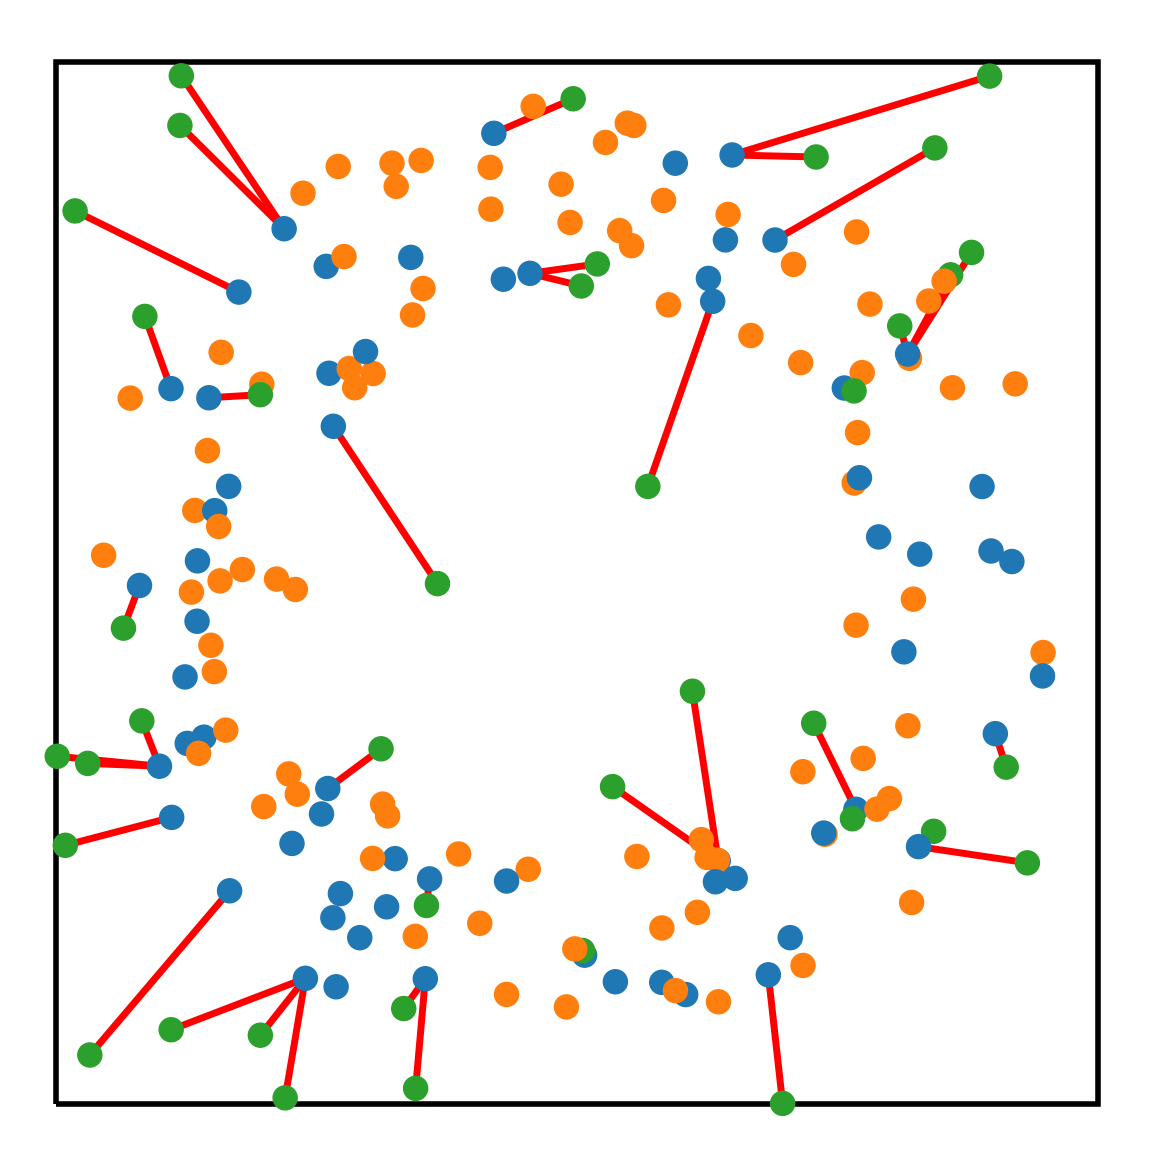

In [9]:
#%% Nearest neighbours

# Load the domain from the specified file
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Calculate the minimum distances between centroids of 'Celltype' D and 'Celltype' A
d, oia, nearest_B, verts_a, verts_b = ms.query.get_minimum_distances_centroids(domain_5, ('Celltype', 'D'), ('Celltype', 'A'))

# Visualize the domain with color coding by 'Celltype'
ms.visualise.visualise(domain_5, 'Celltype', marker_size=300, figure_kwargs={'figsize': (12, 12)}, add_cbar=False, show_boundary=True)

# Plot lines between the nearest neighbours
for i in range(len(verts_a)):
    p1 = verts_a[i]  # Point from 'Celltype' D
    p2 = verts_b[i]  # Nearest point from 'Celltype' A
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], c=[1, 0, 0], linestyle='-', lw=5)  # Plot line

# Hide the axis for a cleaner visualization
plt.gca().axis(False)

MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(367.5, 532.5, 368.0322580645161, 531.9677419354839)

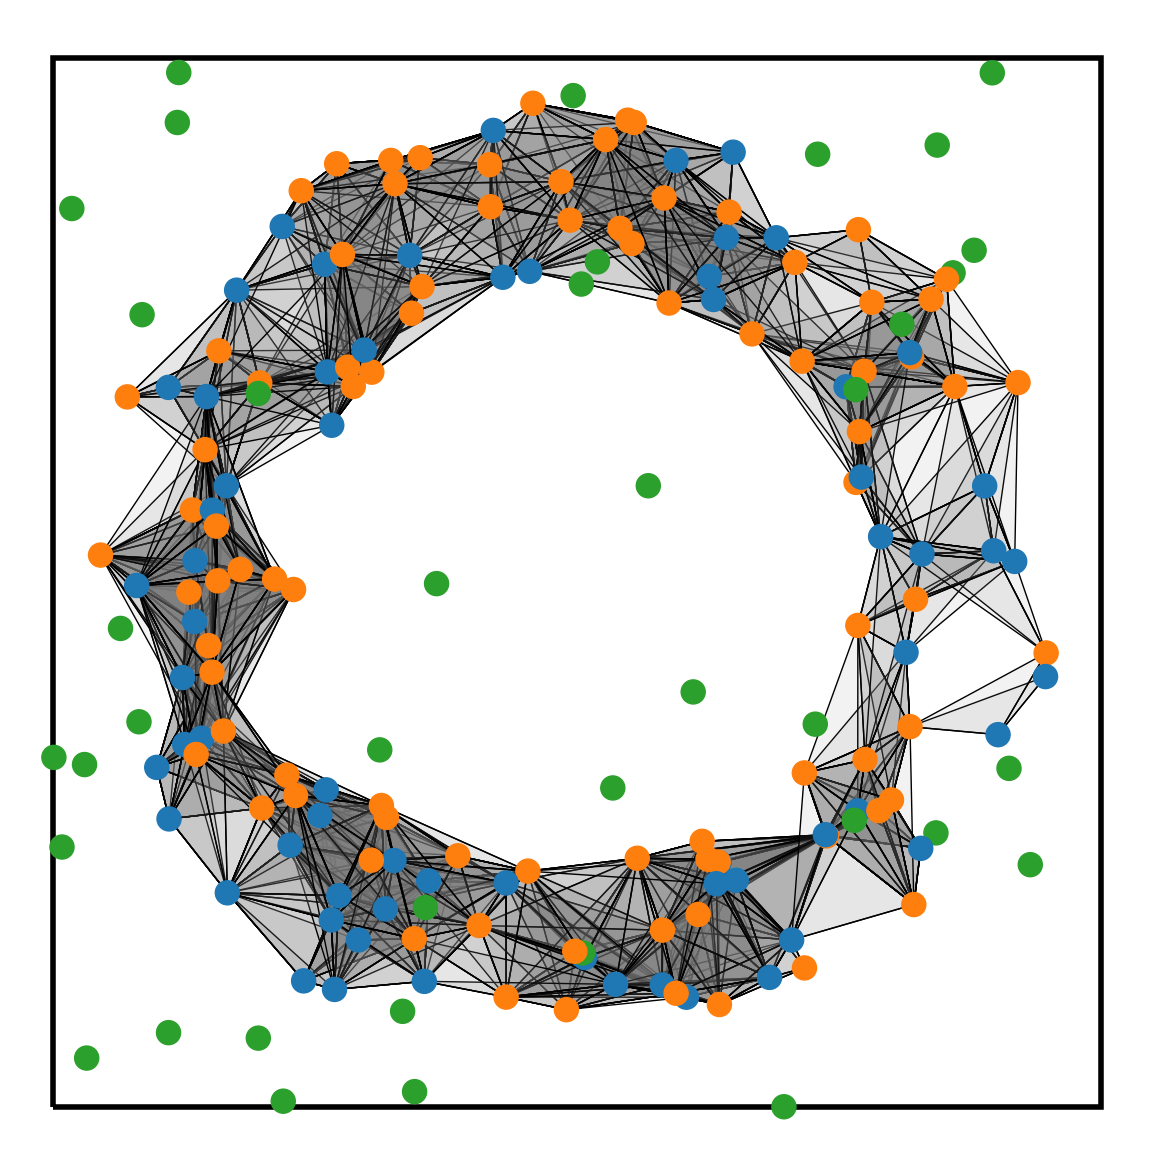

In [10]:
#%% Persistent homology

# Import necessary library
from scipy.spatial.distance import cdist

# Load the domain from the specified file
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Query the domain for objects with label 'Celltype' equal to 'A' or 'B'
q = ms.query.query_container(('Celltype', 'A'), 'OR', ('Celltype', 'B'), domain=domain_5)

# Get the centroids of the queried objects
centroids, inds = ms.query.get_centroids(domain_5, q)

# Calculate the pairwise distances between centroids
d = cdist(centroids, centroids)

# Initialize an empty list to store the triangles
poly_collection = []

# Define the distance threshold
r = 17

# Loop over all combinations of three cells with labels A or B
# If all points are within distance r of one another, draw a triangle
for i1 in range(len(inds)):
    for i2 in range(i1 + 1, len(inds)):
        if d[i1, i2] > r:
            continue
        else:
            for i3 in range(i2 + 1, len(inds)):
                if d[i1, i3] > r:
                    continue
                else:
                    if d[i1, i3] < r:
                        # Accept this triangle
                        poly_collection.append(np.asarray([centroids[i1], centroids[i2], centroids[i3]]))

# Visualize the domain with color coding by 'Celltype'
ms.visualise.visualise(domain_5, 'Celltype', marker_size=300, figure_kwargs={'figsize': (12, 12)}, add_cbar=False, show_boundary=True)

# Import PolyCollection for visualization
from matplotlib.collections import PolyCollection

# Create a PolyCollection from the triangles and add it to the plot
pc = PolyCollection(poly_collection, edgecolors='k', facecolors=[0.5, 0.5, 0.5, 0.1])
plt.gca().add_collection(pc)

# Hide the axis for a cleaner visualization
plt.gca().axis(False)

MuSpAn domain loaded successfully. Domain summary:
Domain name: Archietcture
Number of objects: 189
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(375.0, 525.0)

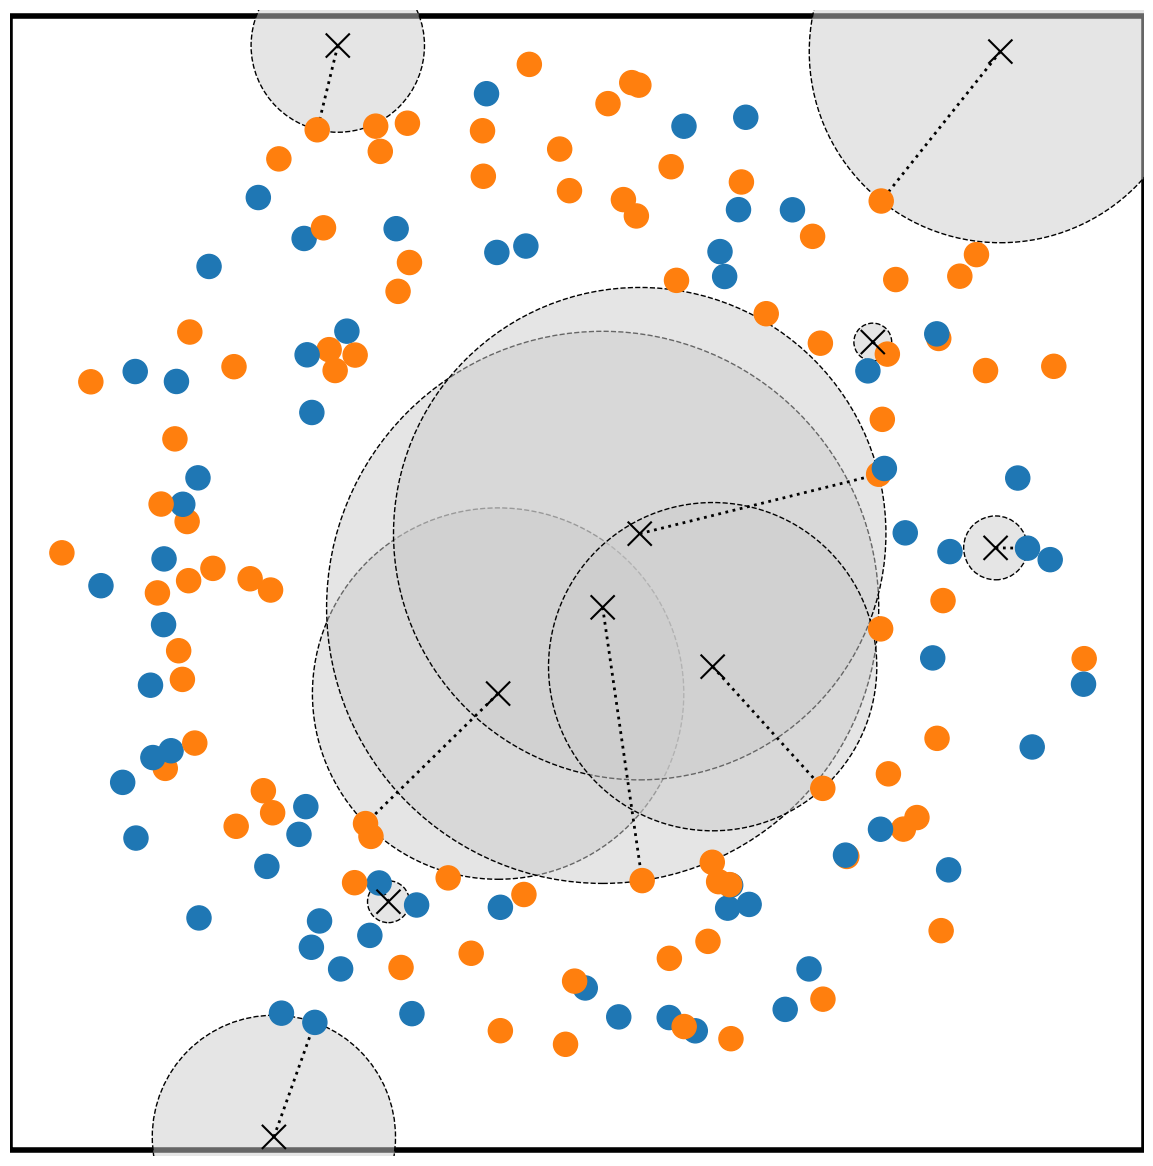

In [11]:
#%% Empty space function

# Load the domain from the specified file
domain_5 = ms.io.load_domain('../domains_for_figs_2_to_6/fig-6-domain.muspan')

# Generate random points within the bounding box of the domain
pts = np.random.rand(10, 2) * (domain.bounding_box[1, :] - domain.bounding_box[0, :]) + domain.bounding_box[0, :]

# Add the random points to the domain
domain_5.add_points(pts, 'Random points')

# Calculate the minimum distances between centroids of 'Random points' and the queried objects
d, oia, nearest_B, verts_a, verts_b = ms.query.get_minimum_distances_centroids(domain_5, ('collection', 'Random points'), q)

# Visualize the domain with color coding by 'Celltype'
ms.visualise.visualise(domain_5, 'Celltype', marker_size=300, figure_kwargs={'figsize': (12, 12)}, add_cbar=False, show_boundary=True, objects_to_plot=q)

# Overlay the random points on the same plot
ms.visualise.visualise(domain_5, color_by=('constant', 'k'), marker_size=300, ax=plt.gca(), scatter_kwargs={'marker': 'x'}, add_cbar=False, objects_to_plot=('collection', 'Random points'))

# Plot circles and lines representing the distances between the random points and their nearest neighbors
for i in range(len(verts_a)):
    p1 = verts_a[i]  # Random point
    p2 = verts_b[i]  # Nearest neighbor
    r = np.sqrt(np.sum((p2 - p1) ** 2))  # Distance between the points
    circle = plt.Circle(p1, r, facecolor=[0.8, 0.8, 0.8, 0.5], edgecolor='k', linestyle='--', linewidth=1)  # Create a circle
    plt.gca().add_patch(circle)  # Add the circle to the plot
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], c='k', linestyle=':', lw=2)  # Plot a line between the points

# Hide the axis for a cleaner visualization
plt.gca().axis(False)
plt.gca().set_xlim(domain_5.bounding_box[:,0])
plt.gca().set_ylim(domain_5.bounding_box[:,1])
